# Initial Exploration

### Merge CSVs, Preprocessing, EDA

In [76]:
import numpy as np
import pandas as pd
import glob
import string
import re
import nltk

from sklearn.feature_extraction.text import CountVectorizer 

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textwrap import wrap

# constants
stopwords = nltk.corpus.stopwords.words('english')
#stopwords = stopwords[:10]

In [77]:
len(nltk.corpus.stopwords.words('english'))

179

In [78]:
'''
Merge datasets in the data folder.
Returns a dataframe of all the data.
'''
def retrieve_reviews_df():
    all_files = glob.glob("../data/*.csv")  

    df_list = []

    for filename in all_files:
        print(f"Concatenating {filename}")
        df = pd.read_csv(filename, index_col=None, header=0)
        df_list.append(df)
    
    return pd.concat(df_list, axis=0, ignore_index=True)

In [79]:
reviews_df = retrieve_reviews_df()
print(reviews_df.head())

Concatenating ../data\Reviews-1.csv
Concatenating ../data\Reviews-2.csv
Concatenating ../data\Reviews-3.csv
Concatenating ../data\Reviews-4.csv
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

              

In [80]:
# number of null values per column
reviews_df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [81]:
# preprocessing for the dataframe 
def score(x):
    if x<3:
        return -1
    elif x==3 or x==4:
        return 0
    else:
        return 1

def preprocessing(df):
    # drop columns
    new_df = df.drop(columns = ["ProductId", "UserId", "ProfileName", "HelpfulnessNumerator", "HelpfulnessDenominator", "Time"])

    # drop na values
    new_df = new_df.dropna(axis=0)

    # make a new column of sentiment: (-1/0/1) -- pos/neutral/neg -- 1,2/3/4,5
    new_df['Sentiment'] = new_df.apply(lambda x: score(x['Score']), axis=1)


    return new_df

In [82]:
df = preprocessing(reviews_df)
df.head()

,Id,Score,Summary,Text,Sentiment
0,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1
2,3,4,"""Delight"" says it all",This is a confection that has been around a fe...,0
3,4,2,Cough Medicine,If you are looking for the secret ingredient i...,-1
4,5,5,Great taffy,Great taffy at a great price. There was a wid...,1


Text Preprocessing

In [83]:
'''
Removing punctuations like . , ! $( ) * % @
Removing URLs
Removing Stop words
Lower casing
Tokenization
Stemming
Lemmatization
'''
def remove_punctuation(text):
    punctuation_free = "".join([i for i in text if i not in string.punctuation])
    return punctuation_free

def tokenization(text):
    tokens = re.split('W+',text)
    return tokens

def remove_stopwords(text):
    products = ['dog', 'food', 'soup', 'chai', 'tea','ordered','order','coconut','taffy','product']
    output= [i for i in text if i not in stopwords]
    output= [i for i in text if i not in products]
    return output

def text_preprocessing(df):
    # remove punctuation
    df["Clean_text"] = df["Text"].apply(lambda x: remove_punctuation(x))

    # tokenization
    # TODO: tokenization is a bit buggy rn, maybe don't use regular expressions
    #df["Clean_text"] = df["Clean_text"].apply(lambda x: tokenization(x))

    # remove stopwords
    df["Clean_text"] = df["Clean_text"].apply(lambda x: remove_stopwords(x))
    
    return df

In [84]:
df = text_preprocessing(df)

In [85]:
df

,Id,Score,Summary,Text,Sentiment,Clean_text
0,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,"[I, , h, a, v, e, , b, o, u, g, h, t, , s, ..."
1,2,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1,"[P, r, o, d, u, c, t, , a, r, r, i, v, e, d, ..."
2,3,4,"""Delight"" says it all",This is a confection that has been around a fe...,0,"[T, h, i, s, , i, s, , a, , c, o, n, f, e, ..."
3,4,2,Cough Medicine,If you are looking for the secret ingredient i...,-1,"[I, f, , y, o, u, , a, r, e, , l, o, o, k, ..."
4,5,5,Great taffy,Great taffy at a great price. There was a wid...,1,"[G, r, e, a, t, , t, a, f, f, y, , a, t, , ..."
...,...,...,...,...,...,...
568449,568450,5,Will not do without,Great for sesame chicken..this is a good if no...,1,"[G, r, e, a, t, , f, o, r, , s, e, s, a, m, ..."
568450,568451,2,disappointed,I'm disappointed with the flavor. The chocolat...,-1,"[I, m, , d, i, s, a, p, p, o, i, n, t, e, d, ..."
568451,568452,5,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1,"[T, h, e, s, e, , s, t, a, r, s, , a, r, e, ..."
568452,568453,5,Favorite Training and reward treat,These are the BEST treats for training and rew...,1,"[T, h, e, s, e, , a, r, e, , t, h, e, , B, ..."


In [86]:
df.loc[df['Sentiment'] == -1]['Clean_text']

1         [P, r, o, d, u, c, t,  , a, r, r, i, v, e, d, ...
3         [I, f,  , y, o, u,  , a, r, e,  , l, o, o, k, ...
12        [M, y,  , c, a, t, s,  , h, a, v, e,  , b, e, ...
16        [I,  , l, o, v, e,  , e, a, t, i, n, g,  , t, ...
26        [T, h, e,  , c, a, n, d, y,  , i, s,  , j, u, ...
                                ...                        
568433    [I,  , j, u, s, t,  , b, o, u, g, h, t,  , t, ...
568434    [T, h, i, s,  , s, o, u, p,  , i, s,  , m, o, ...
568435    [I, t,  , i, s,  , m, o, s, t, l, y,  , b, r, ...
568446    [I,  , h, a, d,  , o, r, d, e, r, e, d,  , s, ...
568450    [I, m,  , d, i, s, a, p, p, o, i, n, t, e, d, ...
Name: Clean_text, Length: 82012, dtype: object

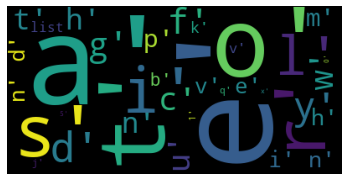

In [87]:
text = df.loc[df['Sentiment'] == 1]['Clean_text'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

model may associate neutral words with certain sentiment scores given distribution of product reviews
review length in relation to sentiment/score
plot porportions of reviews under diff scores -> least negative may affect true negatives of models
average scores for products

In [88]:
pip install wordcloud

You should consider upgrading via the 'c:\Users\ddeha\anaconda3\python.exe -m pip install --upgrade pip' command.
